## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with 20 News Group Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on the News Group Dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Link to the original dataset: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

You can also import the dataset from sklearn.datasets

In [1]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
lemmatizer = WordNetLemmatizer()
from itertools import chain


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Import the 20 news group dataset utilizing sklearn library

mydata_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

mydata_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))


In [3]:
# Print the news groups(target) in the dataset

pprint(list(mydata_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [4]:
# What is the type of 'mydata_train' and 'mydata_test'

print(type(mydata_train))
print(type(mydata_test))

<class 'sklearn.utils.Bunch'>
<class 'sklearn.utils.Bunch'>


In [5]:
# Check the length of the data

print(len(mydata_train.data))
print(len(mydata_train.filenames))
print(len(mydata_test.data))
print(len(mydata_test.filenames))

11314
11314
7532
7532


### Expected Output: 
11314

11314

7532

7532

## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref:https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,less%20important%20ones%20as%20well.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [6]:
text = mydata_train.data
test = mydata_test.data

In [7]:
text[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

## Preprocessing the Corpus

In [8]:
# Preprocessing the data
nltk.download('omw-1.4')
import string
import re
lines = [] 
word_list = [] 
stop_words = set (stopwords.words('english'))

for line in text:
  line_temp = ""
  for char in line:
    if char == "\n" or char == "\t":
      char = " "
    line_temp += char
  lower_text = line_temp.lower()
  punctuationfree ="".join([j for j in lower_text if j not in string.punctuation])
  temp = re.split(' ', punctuationfree)
  words = []
  for word in temp:
    if word not in stop_words:
        word_list.append(lemmatizer.lemmatize(word))
        words.append(lemmatizer.lemmatize(word))
  lines.append(words)

flattened_lines = list(chain.from_iterable(lines))

word_list = list(set(flattened_lines))
# Calculate the total documents present in the corpus
total_docs = len(lines)

# Create a dictionary to keep track of index of each word
dict_idx = {}
for num, word in enumerate(word_list):
  dict_idx[word] = num

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [9]:
# Create a frequency dictionary
 
def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word = {}
    for word in flattened_lines:
        try:
            freq_word[word] += 1
        except KeyError:
            freq_word[word] = 1
    
    return freq_word

In [10]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

freq_word

{'wondering': 185,
 'anyone': 1607,
 'could': 2524,
 'enlighten': 13,
 'car': 1048,
 'saw': 419,
 'day': 1369,
 '2door': 3,
 'sport': 141,
 'looked': 258,
 'late': 206,
 '60': 286,
 'early': 337,
 '70': 172,
 'called': 802,
 'bricklin': 2,
 'door': 244,
 'really': 1433,
 'small': 585,
 'addition': 256,
 'front': 318,
 'bumper': 25,
 'separate': 163,
 'rest': 368,
 'body': 488,
 '': 608292,
 'know': 3767,
 'tellme': 1,
 'model': 525,
 'name': 1089,
 'engine': 329,
 'spec': 129,
 'year': 2631,
 'production': 90,
 'made': 1184,
 'history': 480,
 'whatever': 341,
 'info': 564,
 'funky': 5,
 'looking': 680,
 'please': 1502,
 'email': 1239,
 'fair': 153,
 'number': 1686,
 'brave': 107,
 'soul': 115,
 'upgraded': 37,
 'si': 66,
 'clock': 157,
 'oscillator': 28,
 'shared': 108,
 'experience': 451,
 'poll': 42,
 'send': 852,
 'brief': 54,
 'message': 713,
 'detailing': 11,
 'procedure': 136,
 'top': 386,
 'speed': 586,
 'attained': 7,
 'cpu': 179,
 'rated': 37,
 'add': 383,
 'card': 1071,
 'ada

In [11]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    total_terms = len(document)
    term_freq_in_document = document.count(word)
    
    tf = term_freq_in_document / total_terms
    
    return tf

In [12]:
# Create a function to calculate the Inverse Document Frequency
import math
def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    idf = math.log(len(lines)/freq_word[word]+1)
    return idf

In [13]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_vec = np.zeros((len(dict_idx),))
    for word in sentence:
        tf = term_frequency(sentence, word)
        idf = inverse_df(word)
        tf_idf = tf * idf
        tf_idf_vec[dict_idx[word]] = tf_idf 
    return tf_idf_vec

In [14]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus
tf_idf_table = np.zeros((len(lines), len(word_list)))

for i in range(len(lines)):
  tf_idf_table[i,:] = tfidf(lines[i], dict_idx)

tf_idf_table.shape

(11314, 100167)

## Multinomial Naive Bayes (10 Points)

In [15]:
X_train = tf_idf_table
y_train = mydata_train.target
X_train.shape, y_train.shape

((11314, 100167), (11314,))

In [16]:
#Fit a Multinomial Naive Bayes Model on our dataset
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [17]:
#Perform testing on the train dataset

y_pred_train = model.predict(X_train)

In [18]:
#Calculate the F1 Score and the Accuracy
from sklearn.metrics import accuracy_score, f1_score
F1_score = f1_score(y_train, y_pred_train, average='weighted')
Accuracy = accuracy_score(y_train, y_pred_train)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.8539993042807733
Accuracy:  0.8627364327382004


### Expected Output:
F1 Score: 0.9533633964397735

Accuracy: 0.9524482941488421

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [19]:
#install libraries
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=4a15e12b021662b46124df93d1b85f6953810ac11433c8b53d99296db89091ee
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [20]:
import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
topics = ["US stock market", "Deep Learning", "cricket", "World War"]

# list of articles to be downloaded
articles = []
for i in topics:
  articles.append(wikipedia.search(i)[:5])
# download and store articles (summaries) in this variable
data = []
target_value = []
count = 0
for article in articles:
  for i in article:
    data.append(wikipedia.summary(i))
    target_value.append(count)
  count += 1
print(target_value)


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]


### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):** 
I have cleaned the data similar to the first assigment, removing punctuations and lemmatizing the words. This can help us to remove the redundancy in the data and allow the clustering algorithm more efficiently. Therefore, cleaning the data can help clustering data in better way.

In [21]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
nltk.download('omw-1.4')

def clean_message(message):
  # first of all we will lower the text so that there is no discrepencay
  lower_review = message.lower()
  # removing the punctuation 
  lower_review_removed ="".join([temp for temp in lower_review if temp not in string.punctuation])
  # splitting the cleaned
  words_list = re.split(' ', lower_review_removed)
  words = [lemmatizer.lemmatize(word) for word in words_list if word not in set(stopwords.words('english'))]
  lower_review_removed_lem = ' '.join(words) 

  return lower_review_removed_lem

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [22]:
cleaned_data = []
for i in data:
  cleaned_data.append(clean_message(i))

### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
count_wm = countvectorizer.fit_transform(cleaned_data)
tfidf_wm = tfidfvectorizer.fit_transform(cleaned_data)
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_countvect = pd.DataFrame(data = count_wm.toarray(), columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(), columns = tfidf_tokens)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
df_tfidfvect.shape, df_countvect.shape

((20, 1332), (20, 1332))

### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [25]:
from sklearn.manifold import TSNE

# call TSNE() to fit the data
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_tfidfvect)

print(tsne_results)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 20 samples in 0.000s...
[t-SNE] Computed neighbors for 20 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 20 / 20
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.601871
[t-SNE] KL divergence after 300 iterations: 0.556335
[[  29.197077    47.306297 ]
 [-139.15897    219.52094  ]
 [ -96.16483   -170.1302   ]
 [  27.3626    -184.26411  ]
 [ -43.008423  -106.325424 ]
 [-157.20464    -50.417374 ]
 [ 126.65765     51.59224  ]
 [ 123.587105  -130.55406  ]
 [ 485.54932    101.2449   ]
 [ 219.7504     187.84302  ]
 [ -58.77051     38.393402 ]
 [ -84.29304    -41.52393  ]
 [  66.71788    125.63792  ]
 [-202.80333     11.971264 ]
 [  -3.5059426  -24.976505 ]
 [  38.150475   -97.589676 ]
 [ 171.09581    -40.896038 ]
 [ -35.333206   126.81674  ]
 [-129.97        83.11877  ]
 [  82.890465   -29.592312 ]]


Plot and annotate the points with different markers for different expected groups.

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

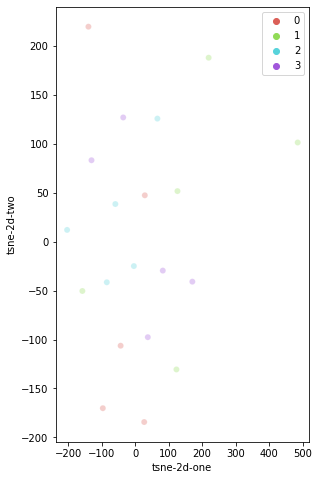

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
# get a figure handle
df_tfidfvect['tsne-2d-one'] = tsne_results[:,0]
df_tfidfvect['tsne-2d-two'] = tsne_results[:,1]
df_tfidfvect["y"] = target_value
plt.subplots(figsize=(10,8))
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=df_tfidfvect.y.tolist(),
    palette=sns.color_palette("hls", 4),
    data=df_tfidfvect,
    legend="full",
    alpha=0.3
)

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 20 samples in 0.001s...
[t-SNE] Computed neighbors for 20 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 20 / 20
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.580048
[t-SNE] KL divergence after 300 iterations: 0.514699
[[-299.58795     14.903405 ]
 [ 120.22605    -54.994606 ]
 [ -41.425106   -52.946266 ]
 [  38.10533     -7.161508 ]
 [  57.5423    -107.660355 ]
 [   5.629652   -84.82795  ]
 [  66.9017     -49.040325 ]
 [ -25.346704    17.044106 ]
 [   1.5889747  -31.579655 ]
 [ -73.896065    60.159206 ]
 [  82.32315     77.402916 ]
 [ -23.17225     83.57727  ]
 [  18.560823    44.644638 ]
 [ -94.24264    -67.78372  ]
 [  69.89018     26.232002 ]
 [-120.31055     16.502493 ]
 [  31.95904    103.1757   ]
 [ -43.72343   -116.48911  ]
 [ 120.9806      10.348315 ]
 [ -70.47219     -7.9513087]]


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

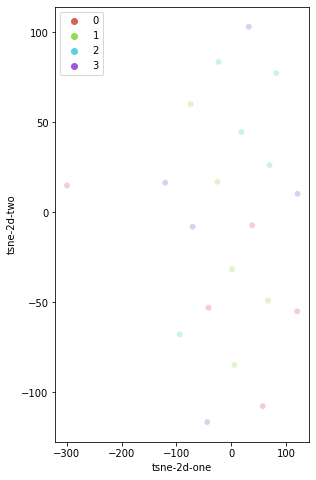

In [27]:
# call TSNE() to fit the data
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_countvect)

print(tsne_results)

# get a figure handle
df_countvect['tsne-2d-one'] = tsne_results[:,0]
df_countvect['tsne-2d-two'] = tsne_results[:,1]
df_countvect["y"] = target_value
plt.subplots(figsize=(10,8))
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=df_countvect.y.tolist(),
    palette=sns.color_palette("hls", 4),
    data=df_countvect,
    legend="full",
    alpha=0.3
)


**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
  
A statistical technique called t-distributed stochastic neighbor embedding (t-SNE) places each data point in 2D or 3D space in order to visualize high-dimensional data. In order to group the points together, it first computes the similarity probability score in a low dimensional space. Second, t-SNE minimizes the Kullback–Leibler divergence (KL divergence) between the two distributions with regard to the positions of the points in the map by defining a comparable probability distribution over the points in the low-dimensional map.
Similar articles in our issue appear to group together or be close by on the second plane.

# Question 3 Building Neural Networks

### We are gonna use Emotions Dataset for this task. We need to classify the given text into different kind of emotions like happy,sad,anger etc.., 

### We are providing train.txt and val.txt files along with this notebook. 

### Library Imports and Utility functions

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
nltk.download('omw-1.4')
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [29]:
# Import the train.txt and val.txt file into pandas dataframe format 
with open('../input/dataset/train.txt') as f:
    train = f.readlines()

with open('../input/dataset/val.txt') as f:
    val = f.readlines()

temp = []
for i in train:
  temp.append(i.split(';'))

train = pd.DataFrame(temp)
train.rename(columns = {0:'text', 1:'sentiment'}, inplace = True)

temp = []
for i in val:
  temp.append(i.split(';'))

val = pd.DataFrame(temp)
val.rename(columns = {0:'text', 1:'sentiment'}, inplace = True)

# and printout the train.shape and validation.shape 
print(train.shape, val.shape)

# expected shape of train dataset is (16000,2) and validation dataset is (2000,2)

(16000, 2) (2000, 2)


In [30]:
# clean the text in the train and validation dataframes using the clean_text function provided above
for i in range(len(train)):
  train['text'][i] = clean_text(str(train['text'][i]))
  train['sentiment'][i] = clean_text(str(train['sentiment'][i][:len(train['sentiment'][i])-1]))


for i in range(len(val)):
  val['text'][i] = clean_text(str(val['text'][i]))
  val['sentiment'][i] = clean_text(str(val['sentiment'][i][:len(val['sentiment'][i])-1]))


In [31]:
# initialise count vectorizer from sklearn module with default parameter
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

# fit on train dataset and transform both train and validation dataset
count_vectorizer.fit(train['text'])
X_train_count = count_vectorizer.transform(train['text']).toarray()
X_val_count = count_vectorizer.transform(val['text']).toarray()
X_train_count.shape, X_val_count.shape

((16000, 13457), (2000, 13457))

In [32]:
# initialise tfidf vectorizer from sklearn module with default parameter
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# fit on train dataset and transform both train and validation dataset
tfidf_vectorizer.fit(train['text'])
X_train_tfidf = tfidf_vectorizer.transform(train['text']).toarray()
X_val_tfidf = tfidf_vectorizer.transform(val['text']).toarray()

In [33]:
# initialise label encoder from sklearn module
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# fit on train labels and transform both train and validation labels
le.fit(train['sentiment'])
y_train_le = le.transform(train['sentiment'])
le.fit(val['sentiment'])
y_val_le = le.transform(val['sentiment'])

In [34]:
# convert the labels into one hot encoding form
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder()
y_train_ohe = OneHotEncoder.fit_transform(train[['sentiment']]).toarray()
y_val_ohe = OneHotEncoder.fit_transform(val[['sentiment']]).toarray()

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [35]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import Model

tf.random.set_seed(42)
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

# complete this linear model in tensorflow
def build_model(X,y):
  # layer 1 : input layer
  inp = tf.keras.Input(shape = (X.shape[1]))

  # layer 2 : add the dense layer with 2048 units and relu activation
  layer2 = Dense(2048, activation= 'relu')(inp)

  # layer 3 : add the dropout layer with dropout rate of 0.5
  layer3 = Dropout(0.5)(layer2)
  
  # layer 4 : add the dense layer with 1024 units with tanh activation and with l2 regularization
  layer4 = Dense(1024, activation='tanh',kernel_regularizer='l2')(layer3)

  # layer 5 : add the dropout layer with dropout rate of 0.5
  layer5 = Dropout(0.5)(layer4)

  # layer 6 : add the dense layer with 512 units with tanh activation and with l2 regularization
  layer6 = Dense(512, activation='tanh',kernel_regularizer='l2')(layer5)

  # layer 7 : add the dropout layer with dropout rate of 0.5
  layer7 = Dropout(0.5)(layer6)

  # layer 8 : add the dense layer with 256 units with tanh activation and with l2 regularization
  layer8  = Dense(256, activation='tanh',kernel_regularizer='l2')(layer7)

  # layer 9 : add the dropout layer with dropout rate of 0.5
  layer9 = Dropout(0.5)(layer8)

  # layer 10 : add the dense layer with 128 units with tanh activation and with l2 regularization
  layer10 = Dense(128, activation='tanh',kernel_regularizer='l2')(layer9)

  # layer 11 : add the dropout layer with dropout rate of 0.5
  layer11 = Dropout(0.5)(layer10)

  # layer 12 : output layer with units equal to number of classes and activation as softmax
  layer12 = Dense(y.shape[1], activation='softmax')(layer11)

  # use loss as categorical crossentropy, optimizer as rmsprop and evaluate model on auc,precision,recall,accuracy 
  model = Model(inputs=inp, outputs=layer12)
  model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=[tf.keras.metrics.AUC(),precision_m, recall_m,'accuracy'])

  return model


In [36]:
X_train_count.shape, y_train_ohe.shape, X_val_count.shape

((16000, 13457), (16000, 6), (2000, 13457))

In [37]:
# call the build_model function and initialize the model
model = build_model(X_train_count, y_train_ohe)
model.summary()

2022-06-20 00:32:22.837265: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13457)]           0         
_________________________________________________________________
dense (Dense)                (None, 2048)              27561984  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0     

In [ ]:
# train and validate the model on the count vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)
history = model.fit(X_train_count, y_train_ohe, validation_data = (X_val_count, y_val_ohe), epochs=10, batch_size=16)

Epoch 1/10
1000/1000 [==============================] - 433s 433ms/step - loss: 1.1753 - auc_1: 0.9226 - precision_m: 0.7458 - recall_m: 0.6230 - accuracy: 0.6982 - val_loss: 1.2049 - val_auc_1: 0.9179 - val_precision_m: 0.7364 - val_recall_m: 0.6055 - val_accuracy: 0.6810
Epoch 2/10
   5/1000 [..............................] - ETA: 7:42 - loss: 1.3527 - auc_1: 0.9080 - precision_m: 0.7670 - recall_m: 0.6375 - accuracy: 0.7000

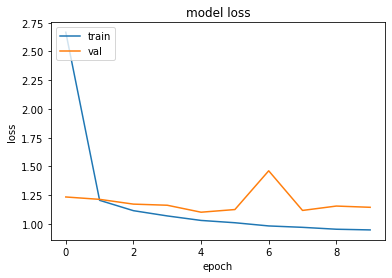

In [39]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

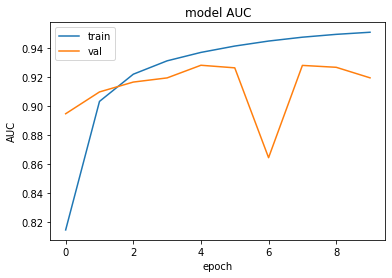

In [40]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

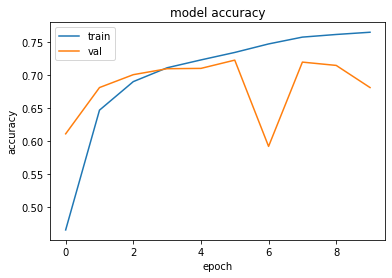

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

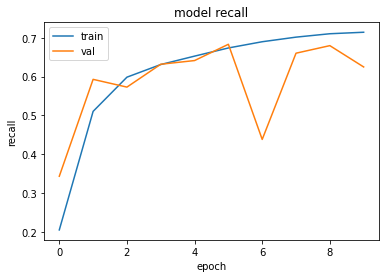

In [42]:
plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

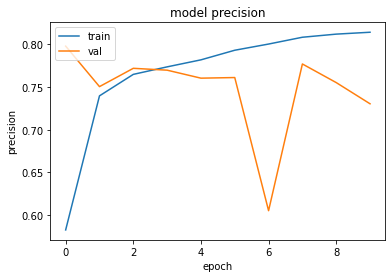

In [43]:
plt.plot(history.history['precision_m'])
plt.plot(history.history['val_precision_m'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [44]:
# again call the build_model function and initialize the model
model = build_model(X_train_tfidf, y_train_ohe)

In [45]:
# train and validate the model on the tfidf vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)
history = model.fit(X_train_tfidf, y_train_ohe, validation_data = (X_val_tfidf, y_val_ohe), epochs=10, batch_size=16)

Epoch 1/10
1000/1000 [==============================] - 137s 135ms/step - loss: 2.1182 - auc_1: 0.8009 - precision_m: 0.3766 - recall_m: 0.1114 - accuracy: 0.3833 - val_loss: 1.3321 - val_auc_1: 0.8639 - val_precision_m: 0.6406 - val_recall_m: 0.2775 - val_accuracy: 0.4555
Epoch 2/10
1000/1000 [==============================] - 135s 135ms/step - loss: 1.2456 - auc_1: 0.8870 - precision_m: 0.6836 - recall_m: 0.3677 - accuracy: 0.5619 - val_loss: 1.1982 - val_auc_1: 0.9034 - val_precision_m: 0.7256 - val_recall_m: 0.5300 - val_accuracy: 0.6420
Epoch 3/10
1000/1000 [==============================] - 135s 135ms/step - loss: 1.1187 - auc_1: 0.9169 - precision_m: 0.7519 - recall_m: 0.5598 - accuracy: 0.6687 - val_loss: 1.1588 - val_auc_1: 0.9128 - val_precision_m: 0.7509 - val_recall_m: 0.5640 - val_accuracy: 0.6665
Epoch 4/10
1000/1000 [==============================] - 134s 134ms/step - loss: 1.0652 - auc_1: 0.9274 - precision_m: 0.7672 - recall_m: 0.6138 - accuracy: 0.7040 - val_loss: 1.1

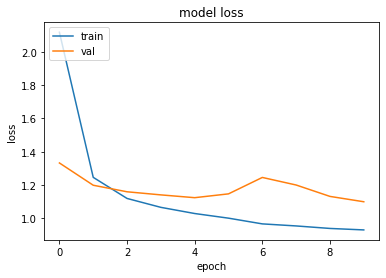

In [46]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

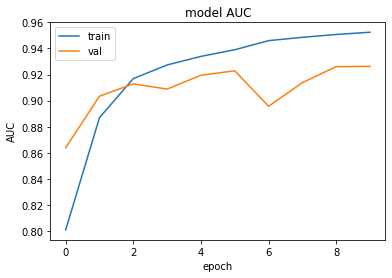

In [47]:
plt.plot(history.history['auc_1'])
plt.plot(history.history['val_auc_1'])
plt.title('model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

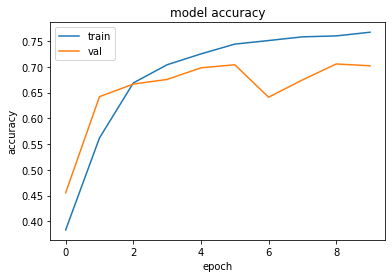

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

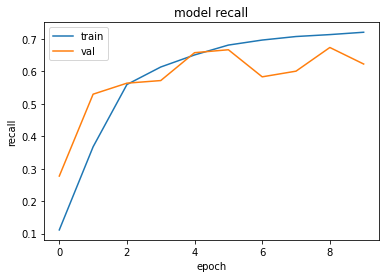

In [49]:
plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

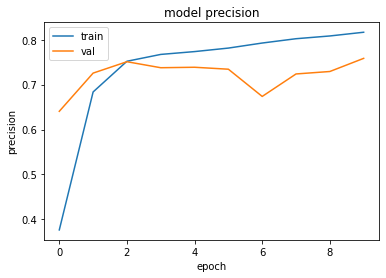

In [50]:
plt.plot(history.history['precision_m'])
plt.plot(history.history['val_precision_m'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:** 
Glove and word2vec are examples of models that learn from word vectors by considering information about their occurrence and co-occurrence. While GloVe is modeled to do dimensionality reduction, word2vec can be thought of as a model that enhances its capacity to predict [(target word | context words). This decrease [minimizing a loss - the reconstruction loss] is on the co-occurrence counts matrix. The lower-dimensional representations are sought after by reconstruction loss.

An evaluation method for article topics is the TF-IDF. This is accomplished by the words that are used. Words are given weight in this context, measuring relevance rather than frequency. Throughout the dataset, TF-IDF scores have taken the role of word counts.

Count vectorizer is just frequency of each word in given document. Therefore, this can only measure the occurrences of a given word and not the importance.

Tf-idf generates a score, whereas Word2vec generates one vector for each word. Word2vec is excellent for digging deeper into our documents and aids in locating content and content subsets. Each word's context is represented by its vectors. (Specifically, the n-gram that it is a component of)

Count Vectorization, TF-IDF can generate huge sparse matrix which can be hard/ redundant while training a model; whereas word2vec and Glove generates a specifc vector of a word which has a meaning and less sparse as well.

What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:** A probabilistic classifier called Naive Bayes makes the assumption that every variable has the same distribution and is independent of every other variable. It is crucial to translate the words into a numerical representation before applying natural language processing algorithms to a batch of data. The two feature extraction techniques are Bag of Words (BoW) and TF-IDF. This procedure is known as feature extraction. How thickly or sparsely the numerical vector is spread determines the major distinction between BoW and TF-IDF. For each news article in the BoW format, a vector is constructed, and if a word is present, a 1 is added to the vector; if not, a 0 is added. Due to the addition of a binary representation for each word that is compared across all texts, this may result in a sparsely populated matrix. Consequently, the matrix can wind up having a lot of 0 in it. We calculate a number known as the TF-IDF valeu for each word that is present in the document for the TF-IDF representation. With this approach, the numerical vector representing all the words in the corpus is much more densely populated, which is a much more desired input when training a Naive Bayes model for Natural Language Processing tasks. Each word is given a number that indicates how important the word is to classify the document.